In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import library
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


##   Download data 
###  menggunakan data saham yang berasal dari Alphavantage dengan kode saham AAL.

In [3]:
#ambil data dari alphavantage
data_source ='alphavantage'

if data_source == 'alphavantage':
    #kunci api
    api_key ='PQJG7BRLGJ7YTVR6'
    #kode saham yang digunakan ALL (American Airlines)
    ticker ="AAL"
    #mengambil data dari URL
    url_string =  "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker,api_key)
    #simpad data 
    file_to_save = 'stock_market_data-%s.csv'%ticker  
    if not os.path.exists(file_to_save):
        with urllib.request.urlopen(url_string) as url:
            data = json.loads(url.read().decode())
            #ekstrak harga saham
            data = data['Time Series (Daily)']
            df = pd.DataFrame(columns=['Date','Low','Hight','Close','Open'])
            for k, v in data.items():
                date = dt.datetime.strptime(k, '%Y-%m-%d')
                data_row = [date.date(),float(v['3. low']),float(v['2. high']),float(v['4. close']),float(v['1. open'])]
                df.loc[-1,:] = data_row
                df.index = df.index + 1
        print('Data saved to : %s'%file_to_save)
        df.to_csv(file_to_save)
else:
    print('File already exists. loading data from CSV')
    df = pd.read_csv(file_to_save)

Data saved to : stock_market_data-AAL.csv


In [40]:
#eksplorasi data
import pandas as pd 
df = pd.read_csv("AAL.csv") 
df = df.sort_values('Date')
df.head()
#print(df.shape)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-09-27,21.049999,21.400000,19.100000,19.299999,18.194910,961200
1,2005-09-28,19.299999,20.530001,19.200001,20.500000,19.326199,5747900
2,2005-09-29,20.400000,20.580000,20.100000,20.209999,19.052801,1078200
3,2005-09-30,20.260000,21.049999,20.180000,21.010000,19.806999,3123300
4,2005-10-03,20.900000,21.750000,20.900000,21.500000,20.268938,1057900


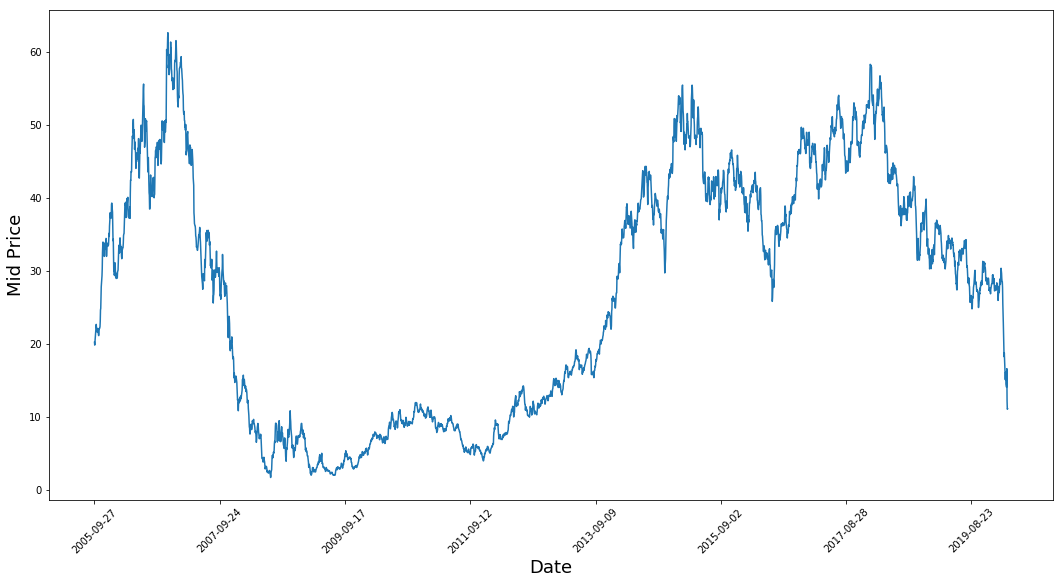

In [28]:
# Visualisasi data
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [35]:
#membagi data menjadi data training dan data testing
high_prices = df.loc[:,'High'].as_matrix()
low_prices = df.loc[:,'Low'].as_matrix()
mid_prices = (high_prices+low_prices)/2.0

C:\Users\Nurdi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Nurdi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
train_data = mid_prices[:11000]
test_data = mid_prices[11000:]
print(train_data)
print(test_data)

[0.30396584 0.2976435  0.3054438  ... 0.02414231 0.         0.00137654]
[]


## Preprocessing Data 

In [49]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)


In [50]:
# Normalisasi data
smoothing_window_size = 2500
for di in range(0,10000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [11]:
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.